In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using StatsBase

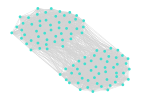

In [78]:
rng = Random.default_rng();

# graph parameters
# n = 100
# p = 0.9
# eta = 0.2

# # planted ranking score
# planted_score = randperm(rng,n)

# # graph model
# type = "MUN" 

# if type=="MUN"
#     meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
# elseif type=="ERO"
#     meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
# end

# planted ranking score
n = 100

planted_score = randperm(rng,n)
eta = 0.5
noise = 0.6
p_in = 0.8
p_out = 0.1
meta_g = ero_mun_sbm(rng,n,p_in,p_out,eta,noise;planted_score)
gplot(meta_g)

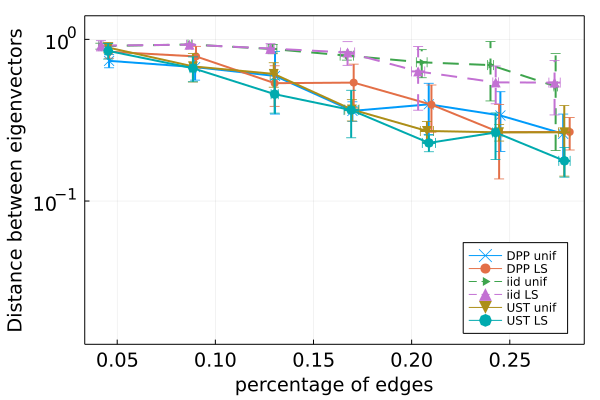

In [86]:
# number of batches and MC runs
n_batch = 7;
n_rep = 5; #paper 50

D_all = benchmark_syncrank(meta_g,planted_score, n_batch, n_rep, rng);


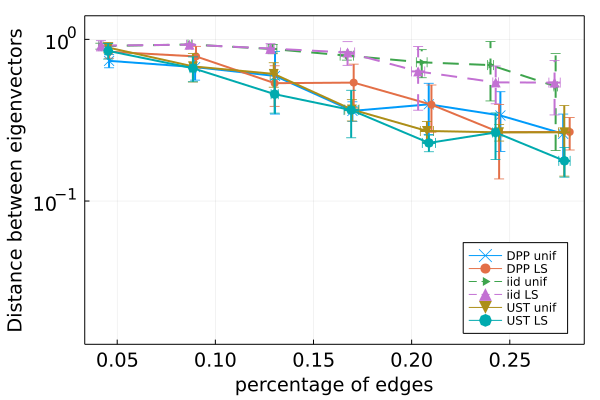

In [92]:
metric= "err" #"spear" #"tau" #"err"
plot_comparison(metric)

In [91]:
function plot_comparison(metric::String)

    metric_std = metric*"_std"

    method =  "DPP unif"
    D = D_all[method]
    x = D["percent_edges"]
    y = D[metric]
    y_er = D[metric_std]

    plot(x,y,
    yerror=y_er,
    labels = method,
    markerstrokecolor=:auto,
    markershape=:xcross,
    markersize = 5,
    linewidth=2,
    markerstrokewidth=2,
    xtickfont=font(13), 
    ytickfont=font(13), 
    guidefont=font(13), 
    legendfont=font(13),
    framestyle = :box,
    margins = 0.1*2Plots.cm)

    method =  "DPP LS"
    D = D_all[method]
    x = D["percent_edges"]
    y = D[metric]
    y_er = D[metric_std]

    plot!(x,y,yerror=y_er,
    labels = method,
    markerstrokecolor=:auto,
    markershape=:circle,
    markersize = 5,
    linewidth=2,
    markerstrokewidth=2)

    method = "iid unif"
    D = D_all[method]
    x = D["percent_edges"]
    x_er = D["percent_edges_std"]

    y = D[metric]
    y_er = D[metric_std]

    plot!(x,y,
    xerror=x_er,
    yerror=y_er,
    labels = method,
    markerstrokecolor=:auto,
    markersize = 5,
    linestyle=:dash,
    markershape=:rtriangle,
    linewidth=2,
    markerstrokewidth=2)

    method = "iid LS"
    D = D_all[method]
    x = D["percent_edges"]
    x_er = D["percent_edges_std"]

    y = D[metric]
    y_er = D[metric_std]

    plot!(x,y,
    xerror=x_er,
    yerror=y_er,
    labels = method,
    markerstrokecolor=:auto,
    markersize = 5,
    linestyle=:dash,
    markershape=:utriangle,
    linewidth=2,
    markerstrokewidth=2)

    method =  "UST unif"
    D = D_all[method]

    x = D["percent_edges"]
    y = D[metric]
    y_er = D[metric_std]

    plot!(x,y,
    xerror=x_er,
    yerror=y_er,
    labels = method,
    markerstrokecolor=:auto,
    markersize = 5,
    markershape=:dtriangle,
    legend=:bottomright,
    linewidth=2,
    markerstrokewidth=2,
    framestyle = :box,
    margins = 0.1*2Plots.cm)

    method =  "UST LS"
    D = D_all[method]

    x = D["percent_edges"]
    y = D[metric]
    y_er = D[metric_std]

    plot!(x,y,
    xerror=x_er,
    yerror=y_er,
    labels = method,
    markerstrokecolor=:auto,
    markersize = 5,
    markershape=:octagon,
    legend=:bottomright,
    linewidth=2,
    markerstrokewidth=2,
    framestyle = :box,
    margins = 0.1*2Plots.cm)

    xlabel!("percentage of edges")

    if metric==="err"

        ylabel!("Distance between eigenvectors")
        yaxis!(:log)
        ylims!((1.3*1e-2,1.4))

    elseif metric==="tau"

        x = D["percent_edges"]
        y = D["tau_full"]*ones(size(x))
        plot!(x,y, labels = "full")
        ylabel!("Kendall's tau distance ")

    elseif metric==="upsets_in_top"

        ylabel!("number of upsets in top 10 ")

    elseif metric==="spear"

        plot!(x,y,
        xerror=x_er,
        yerror=y_er,
        labels = method,
        markerstrokecolor=:auto,
        markersize = 5,
        markershape=:octagon,
        legend=:bottomright,
        linewidth=2,
        markerstrokewidth=2,
        framestyle = :box,
        margins = 0.1*2Plots.cm)

        x = D["percent_edges"]
        y = D["spear_full"]*ones(size(x))
        plot!(x,y, labels = "full")
        ylabel!("Spearman")

    end

end

plot_comparison (generic function with 1 method)

In [84]:
t = "a"
"a"==="a"

true

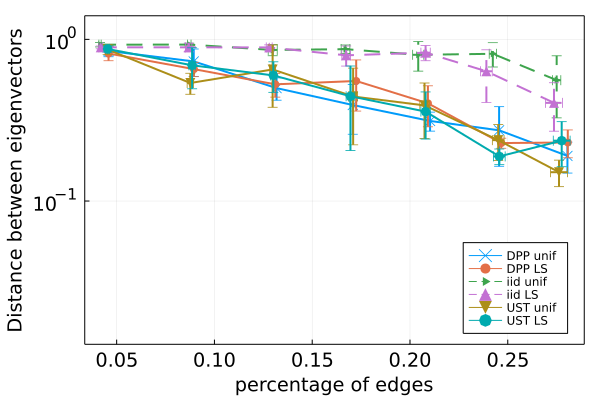

In [80]:
method =  "DPP unif"
D = D_all[method]
x = D["percent_edges"]
y = D["err"]
y_er = D["err_std"]

plot(x,y,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:xcross,
markersize = 5,
linewidth=2,
markerstrokewidth=2,
xtickfont=font(13), 
ytickfont=font(13), 
guidefont=font(13), 
legendfont=font(13),
framestyle = :box,
margins = 0.1*2Plots.cm)

method =  "DPP LS"
D = D_all[method]
x = D["percent_edges"]
y = D["err"]
y_er = D["err_std"]

plot!(x,y,yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

method = "iid unif"
D = D_all[method]
x = D["percent_edges"]
x_er = D["percent_edges_std"]

y = D["err"]
y_er = D["err_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
linestyle=:dash,
markershape=:rtriangle,
linewidth=2,
markerstrokewidth=2)

method = "iid LS"
D = D_all[method]
x = D["percent_edges"]
x_er = D["percent_edges_std"]

y = D["err"]
y_er = D["err_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
linestyle=:dash,
markershape=:utriangle,
linewidth=2,
markerstrokewidth=2)

method =  "UST unif"
D = D_all[method]

x = D["percent_edges"]
y = D["err"]
y_er = D["err_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
markershape=:dtriangle,
legend=:bottomright,
linewidth=2,
markerstrokewidth=2,
framestyle = :box,
margins = 0.1*2Plots.cm)

method =  "UST LS"
D = D_all[method]

x = D["percent_edges"]
y = D["err"]
y_er = D["err_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
markershape=:octagon,
legend=:bottomright,
linewidth=2,
markerstrokewidth=2,
framestyle = :box,
margins = 0.1*2Plots.cm)

ylims!((1.3*1e-2,1.4))

xlabel!("percentage of edges")
ylabel!("Distance between eigenvectors")

# foldername = "figures/"
# name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"EigenDistance_norm.pdf"
# savefig(foldername*name)

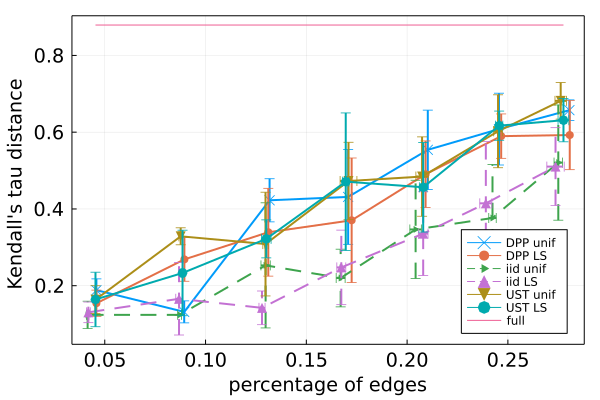

In [81]:
method =  "DPP unif"
D = D_all[method]

x = D["percent_edges"]
y = D["tau"]
y_er = D["tau_std"]

plot(x,y,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markershape=:xcross,
markersize = 5,
linewidth=2,
markerstrokewidth=2,
xtickfont=font(13), 
ytickfont=font(13), 
guidefont=font(13), 
legendfont=font(13))

method =  "DPP LS"
D = D_all[method]

x = D["percent_edges"]
y = D["tau"]
y_er = D["tau_std"]

plot!(x,y,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

method =  "iid unif"
D = D_all[method]

x = D["percent_edges"]
y = D["tau"]
x_er = D["percent_edges_std"]
y_er = D["tau_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
linestyle=:dash,
markershape=:rtriangle,
linewidth=2,
markerstrokewidth=2)

method =  "iid LS"
D = D_all[method]

x = D["percent_edges"]
y = D["tau"]
x_er = D["percent_edges_std"]
y_er = D["tau_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
linestyle=:dash,
markershape=:utriangle,
legend=:bottomright,
linewidth=2,
markerstrokewidth=2,
framestyle = :box,
margins = 0.1*2Plots.cm)

method =  "UST unif"
D = D_all[method]

x = D["percent_edges"]
y = D["tau"]
x_er = D["percent_edges_std"]
y_er = D["tau_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
markershape=:dtriangle,
legend=:bottomright,
linewidth=2,
markerstrokewidth=2,
framestyle = :box,
margins = 0.1*2Plots.cm)

method =  "UST LS"
D = D_all[method]

x = D["percent_edges"]
y = D["tau"]
x_er = D["percent_edges_std"]
y_er = D["tau_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
markershape=:octagon,
legend=:bottomright,
linewidth=2,
markerstrokewidth=2,
framestyle = :box,
margins = 0.1*2Plots.cm)

x = D["percent_edges"]
y = D["tau_full"]*ones(size(x))
plot!(x,y, labels = "full")


xlabel!("percentage of edges")
ylabel!("Kendall's tau distance ")

# foldername = "figures/"
# name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"Kendall_norm.pdf"
# savefig(foldername*name)

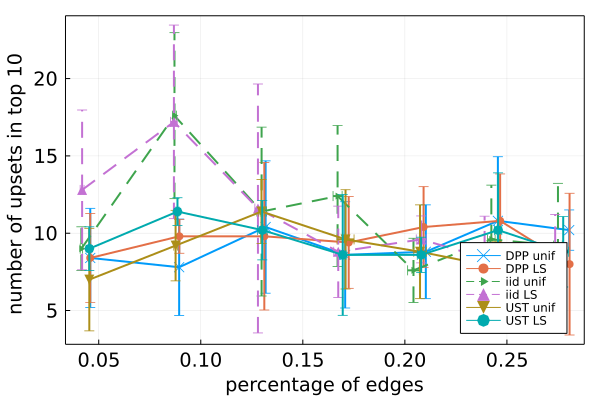

In [82]:
method =  "DPP unif"
D = D_all[method]

x = D["percent_edges"]
y = D["upsets_in_top"]
y_er = D["upsets_in_top_std"]

plot(x,y,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markershape=:xcross,
markersize = 5,
linewidth=2,
markerstrokewidth=2,
xtickfont=font(13), 
ytickfont=font(13), 
guidefont=font(13), 
legendfont=font(13))

method =  "DPP LS"
D = D_all[method]

x = D["percent_edges"]
y = D["upsets_in_top"]
y_er = D["upsets_in_top_std"]

plot!(x,y,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

method =  "iid unif"
D = D_all[method]

x = D["percent_edges"]
x_er = D["percent_edges_std"]

y = D["upsets_in_top"]
y_er = D["upsets_in_top_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
linestyle=:dash,
markershape=:rtriangle,
linewidth=2,
markerstrokewidth=2)

method =  "iid LS"
D = D_all[method]

x = D["percent_edges"]
x_er = D["percent_edges_std"]

y = D["upsets_in_top"]
y_er = D["upsets_in_top_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
linestyle=:dash,
markershape=:utriangle,
legend=:bottomright,
linewidth=2,
markerstrokewidth=2,
framestyle = :box,
margins = 0.1*2Plots.cm)

method =  "UST unif"
D = D_all[method]

x = D["percent_edges"]
x_er = D["percent_edges_std"]

y = D["upsets_in_top"]
y_er = D["upsets_in_top_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
markershape=:dtriangle,
legend=:bottomright,
linewidth=2,
markerstrokewidth=2,
framestyle = :box,
margins = 0.1*2Plots.cm)

method =  "UST LS"
D = D_all[method]

x = D["percent_edges"]
x_er = D["percent_edges_std"]

y = D["upsets_in_top"]
y_er = D["upsets_in_top_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
markershape=:octagon,
legend=:bottomright,
linewidth=2,
markerstrokewidth=2,
framestyle = :box,
margins = 0.1*2Plots.cm)



xlabel!("percentage of edges")
ylabel!("number of upsets in top 10 ")

# foldername = "figures/"
# name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"Kendall_norm.pdf"
# savefig(foldername*name)

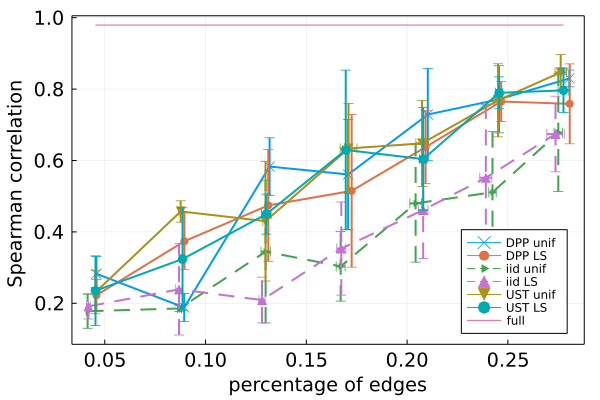

In [83]:
method =  "DPP unif"
D = D_all[method]

x = D["percent_edges"]
y = D["spear"]
y_er = D["spear_std"]

plot(x,y,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markershape=:xcross,
markersize = 5,
linewidth=2,
markerstrokewidth=2,
xtickfont=font(13), 
ytickfont=font(13), 
guidefont=font(13), 
legendfont=font(13))

method =  "DPP LS"
D = D_all[method]

x = D["percent_edges"]
y = D["spear"]
y_er = D["spear_std"]

plot!(x,y,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

method =  "iid unif"
D = D_all[method]

x = D["percent_edges"]
y = D["spear"]
x_er = D["percent_edges_std"]
y_er = D["spear_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
linestyle=:dash,
markershape=:rtriangle,
linewidth=2,
markerstrokewidth=2)

method =  "iid LS"
D = D_all[method]

x = D["percent_edges"]
y = D["spear"]
x_er = D["percent_edges_std"]
y_er = D["spear_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
linestyle=:dash,
markershape=:utriangle,
legend=:bottomright,
linewidth=2,
markerstrokewidth=2,
framestyle = :box,
margins = 0.1*2Plots.cm)

method =  "UST unif"
D = D_all[method]

x = D["percent_edges"]
y = D["spear"]
x_er = D["percent_edges_std"]
y_er = D["spear_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
markershape=:dtriangle,
legend=:bottomright,
linewidth=2,
markerstrokewidth=2,
framestyle = :box,
margins = 0.1*2Plots.cm)

method =  "UST LS"
D = D_all[method]

x = D["percent_edges"]
y = D["spear"]
x_er = D["percent_edges_std"]
y_er = D["spear_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
markershape=:octagon,
legend=:bottomright,
linewidth=2,
markerstrokewidth=2,
framestyle = :box,
margins = 0.1*2Plots.cm)

x = D["percent_edges"]
y = D["spear_full"]*ones(size(x))
plot!(x,y, labels = "full")


xlabel!("percentage of edges")
ylabel!("Spearman correlation ")

# foldername = "figures/"
# name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"Kendall_norm.pdf"
# savefig(foldername*name)

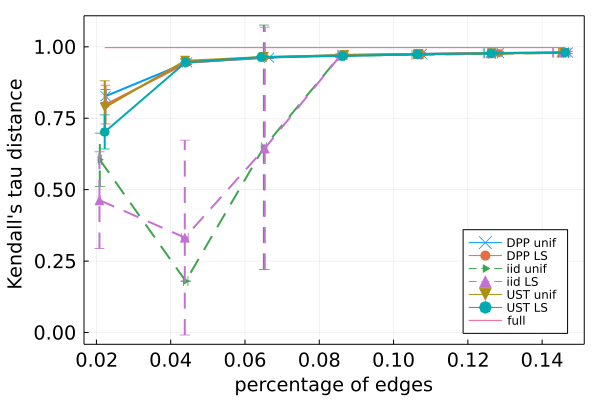

In [11]:
method =  "DPP unif"
D = D_all[method]

x = D["percent_edges"]
y = D["tau"]
y_er = D["tau_std"]

plot(x,y,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markershape=:xcross,
markersize = 5,
linewidth=2,
markerstrokewidth=2,
xtickfont=font(13), 
ytickfont=font(13), 
guidefont=font(13), 
legendfont=font(13))

method =  "DPP LS"
D = D_all[method]

x = D["percent_edges"]
y = D["tau"]
y_er = D["tau_std"]

plot!(x,y,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

method =  "iid unif"
D = D_all[method]

x = D["percent_edges"]
y = D["tau"]
x_er = D["percent_edges_std"]
y_er = D["tau_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
linestyle=:dash,
markershape=:rtriangle,
linewidth=2,
markerstrokewidth=2)

method =  "iid LS"
D = D_all[method]

x = D["percent_edges"]
y = D["tau"]
x_er = D["percent_edges_std"]
y_er = D["tau_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
linestyle=:dash,
markershape=:utriangle,
legend=:bottomright,
linewidth=2,
markerstrokewidth=2,
framestyle = :box,
margins = 0.1*2Plots.cm)

method =  "UST unif"
D = D_all[method]

x = D["percent_edges"]
y = D["tau"]
x_er = D["percent_edges_std"]
y_er = D["tau_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
markershape=:dtriangle,
legend=:bottomright,
linewidth=2,
markerstrokewidth=2,
framestyle = :box,
margins = 0.1*2Plots.cm)

method =  "UST LS"
D = D_all[method]

x = D["percent_edges"]
y = D["tau"]
x_er = D["percent_edges_std"]
y_er = D["tau_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
markershape=:octagon,
legend=:bottomright,
linewidth=2,
markerstrokewidth=2,
framestyle = :box,
margins = 0.1*2Plots.cm)

x = D["percent_edges"]
y = D["tau_full"]*ones(size(x))
plot!(x,y, labels = "full")


xlabel!("percentage of edges")
ylabel!("Kendall's tau distance ")

# foldername = "figures/"
# name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"Kendall_norm.pdf"
# savefig(foldername*name)

In [18]:
rng = Random.default_rng();

# graph parameters
n = 300
p = 0.9
eta = 0.4

# planted ranking score
planted_score = randperm(rng,n)

# graph model
type = "ERO" 

if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# number of batches and MC runs
n_batch = 7;
n_rep = 5; #paper 50

D_all = benchmark_syncrank(meta_g,planted_score, n_batch, n_rep, rng);

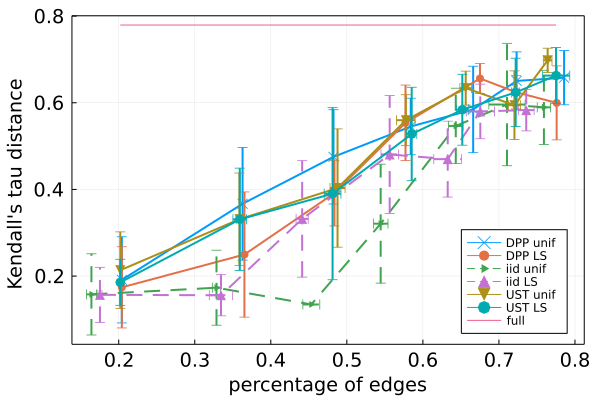

In [16]:
method =  "DPP unif"
D = D_all[method]

x = D["percent_edges"]
y = D["tau"]
y_er = D["tau_std"]

plot(x,y,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markershape=:xcross,
markersize = 5,
linewidth=2,
markerstrokewidth=2,
xtickfont=font(13), 
ytickfont=font(13), 
guidefont=font(13), 
legendfont=font(13))

method =  "DPP LS"
D = D_all[method]

x = D["percent_edges"]
y = D["tau"]
y_er = D["tau_std"]

plot!(x,y,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

method =  "iid unif"
D = D_all[method]

x = D["percent_edges"]
y = D["tau"]
x_er = D["percent_edges_std"]
y_er = D["tau_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
linestyle=:dash,
markershape=:rtriangle,
linewidth=2,
markerstrokewidth=2)

method =  "iid LS"
D = D_all[method]

x = D["percent_edges"]
y = D["tau"]
x_er = D["percent_edges_std"]
y_er = D["tau_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
linestyle=:dash,
markershape=:utriangle,
legend=:bottomright,
linewidth=2,
markerstrokewidth=2,
framestyle = :box,
margins = 0.1*2Plots.cm)

method =  "UST unif"
D = D_all[method]

x = D["percent_edges"]
y = D["tau"]
x_er = D["percent_edges_std"]
y_er = D["tau_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
markershape=:dtriangle,
legend=:bottomright,
linewidth=2,
markerstrokewidth=2,
framestyle = :box,
margins = 0.1*2Plots.cm)

method =  "UST LS"
D = D_all[method]

x = D["percent_edges"]
y = D["tau"]
x_er = D["percent_edges_std"]
y_er = D["tau_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
markershape=:octagon,
legend=:bottomright,
linewidth=2,
markerstrokewidth=2,
framestyle = :box,
margins = 0.1*2Plots.cm)

x = D["percent_edges"]
y = D["tau_full"]*ones(size(x))
plot!(x,y, labels = "full")


xlabel!("percentage of edges")
ylabel!("Kendall's tau distance ")

# foldername = "figures/"
# name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"Kendall_norm.pdf"
# savefig(foldername*name)

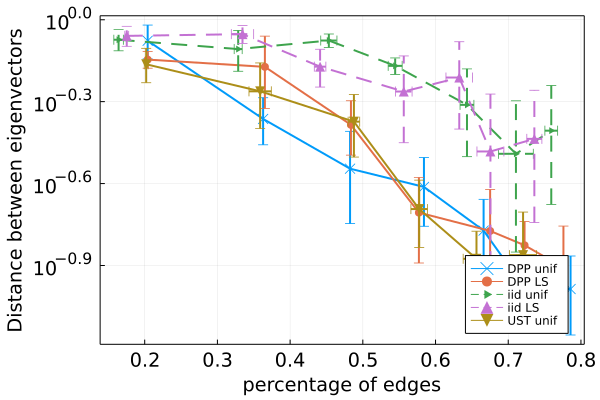

In [17]:
method =  "DPP unif"
D = D_all[method]
x = D["percent_edges"]
y = D["err"]
y_er = D["err_std"]

plot(x,y,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:xcross,
markersize = 5,
linewidth=2,
markerstrokewidth=2,
xtickfont=font(13), 
ytickfont=font(13), 
guidefont=font(13), 
legendfont=font(13),
framestyle = :box,
margins = 0.1*2Plots.cm)

method =  "DPP LS"
D = D_all[method]
x = D["percent_edges"]
y = D["err"]
y_er = D["err_std"]

plot!(x,y,yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

method = "iid unif"
D = D_all[method]
x = D["percent_edges"]
x_er = D["percent_edges_std"]

y = D["err"]
y_er = D["err_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
linestyle=:dash,
markershape=:rtriangle,
linewidth=2,
markerstrokewidth=2)

method = "iid LS"
D = D_all[method]
x = D["percent_edges"]
x_er = D["percent_edges_std"]

y = D["err"]
y_er = D["err_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
linestyle=:dash,
markershape=:utriangle,
linewidth=2,
markerstrokewidth=2)

method =  "UST unif"
D = D_all[method]

x = D["percent_edges"]
y = D["err"]
y_er = D["err_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
markershape=:dtriangle,
legend=:bottomright,
linewidth=2,
markerstrokewidth=2,
framestyle = :box,
margins = 0.1*2Plots.cm)

method =  "UST LS"
D = D_all[method]

x = D["percent_edges"]
y = D["err"]
y_er = D["err_std"]

#ylims!((1.3*1e-2,1.4))

xlabel!("percentage of edges")
ylabel!("Distance between eigenvectors")

# foldername = "figures/"
# name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"EigenDistance_norm.pdf"
# savefig(foldername*name)